<a href="https://colab.research.google.com/github/Artrob02/UCLA_MQE_AA/blob/main/MLLABAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the data from CCLE into a new Google Colab file

Assignment 2 - ARTURS APINIS

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/ML/insurance.csv')

In [ ]:
pd.get_dummies(df)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
df = pd.get_dummies(df)

In [ ]:
df = df.drop(columns =['sex_male','smoker_no', 'region_southwest'])

In [ ]:
df['charges_fin'] = df.loc[:,'charges']

In [ ]:
df = df.drop(columns =['charges'])

In [ ]:
df

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,charges_fin
0,19,27.900,0,1,1,0,0,0,16884.92400
1,18,33.770,1,0,0,0,0,1,1725.55230
2,28,33.000,3,0,0,0,0,1,4449.46200
3,33,22.705,0,0,0,0,1,0,21984.47061
4,32,28.880,0,0,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,0,0,1,0,10600.54830
1334,18,31.920,0,1,0,1,0,0,2205.98080
1335,18,36.850,0,1,0,0,0,1,1629.83350
1336,21,25.800,0,1,0,0,0,0,2007.94500


# 2.) Split the data into 80/20, in/out sample

In [ ]:
import numpy as np

In [ ]:
data = np.array(df.iloc[:, :-1])
target = np.array(df.iloc[:, -1])

In [ ]:
cut = int((len(data) * .8) //1)

In [ ]:
in_data = data[:cut]
out_data = data[cut:]

in_target = target[:cut]
out_target = target[cut:]

In [ ]:
data

array([[19.  , 27.9 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  1.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [61.  , 29.07,  0.  , ...,  0.  ,  1.  ,  0.  ]])

# 3.) Normalize the Data

In [ ]:
from sklearn import preprocessing

In [ ]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

# 4.) Get lambda from Lasso cross validation

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [ ]:
modCV.alpha_

133.34880015958146

In [ ]:
a = modCV.alpha_

# 5.) Run a lambda regression with that Lambda

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [ ]:
mod1.predict(np.array(in_data_scale))

array([25197.32965886,  3816.43977687,  6762.18315135, ...,
       12168.66093475, 11543.12574353, 12308.56980988])

In [ ]:
mod1.coef_

array([3562.0377078 , 1885.27475593,  395.84593359,    0.        ,
       9328.6028876 ,  274.4562296 ,   59.97132192,   -0.        ])

# 6.) Visualize the coefficients 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
#vis = mod1.coef_

In [ ]:
#sns.histplot(data=vis)
#plt.show()

In [ ]:
column_names = list(df.columns.values)
column_names = column_names[:-1]
column_names

['age',
 'bmi',
 'children',
 'sex_female',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast']

<function matplotlib.pyplot.show(*args, **kw)>

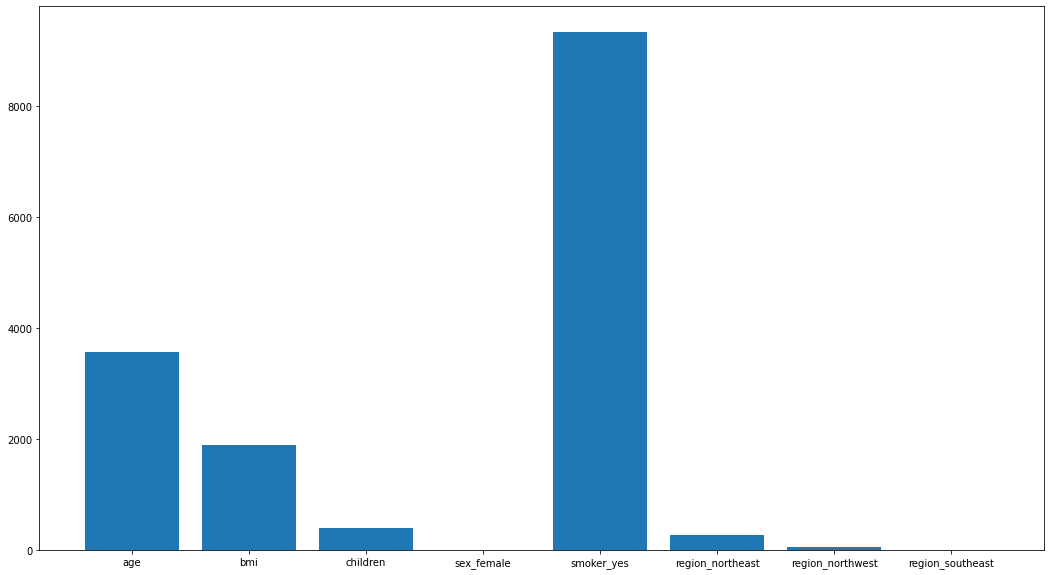

In [ ]:
figure(figsize = (18,10))
plt.bar(column_names, mod1.coef_)
plt.show

# 7.) Interpret the coefficients

# 8.) Compare in and out of sample MSE’s

Smokers, older people and people with a higher BMI have higher insurance charges. The other variables have no effect.

In [ ]:
import sklearn
from sklearn import metrics

In [ ]:
train_pred = mod1.predict(in_data_scale)

In [ ]:
test_pred = mod1.predict(out_data_scale)

In [ ]:
np.sqrt(sklearn.metrics.mean_squared_error(in_target, train_pred))

6043.80801621451

In [ ]:
np.sqrt(sklearn.metrics.mean_squared_error(out_target,test_pred))

6098.556774653077